## Cointegration Testing

This notebook explores ***cointegration*** between pairs of equities. The code is written mostly in a generalized manner to allow for flexible testing of various equities, however, it has not been tested with large datasets or a significant amount of combinations. The notebook will take a list of symbols, retrieve historical data, evaluate the stationarity, and return the pair with the strongest evidence of cointegration.

For more detailed information, please refer to the Wikipedia page on [Cointegration](https://en.wikipedia.org/wiki/Cointegration).

### Import Libraries

In [17]:
import pandas as pd
import numpy as np
import math
import yfinance as yf

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
from statsmodels.tsa.stattools import adfuller
from sklearn import linear_model

### Download Data
For my testing I utilized 4 US oil equities

In [73]:
symbols = ["XOM", "CVX", "COP", "OXY"]
market = list()

start_date = "2003-01-01" # January 1, 2005
end_date = "2008-01-01" # January 1, 2010

for symbol in symbols:

    historical_data = yf.download(symbol, start = start_date, end = end_date)
    market.append(historical_data.reset_index())

market_dict = dict(zip(symbols, market))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Plot Price History
Plotting the price over the selected time period will allow us to look for visual evidence of cointegration. The loop plots every combination of price histories within the selected market.

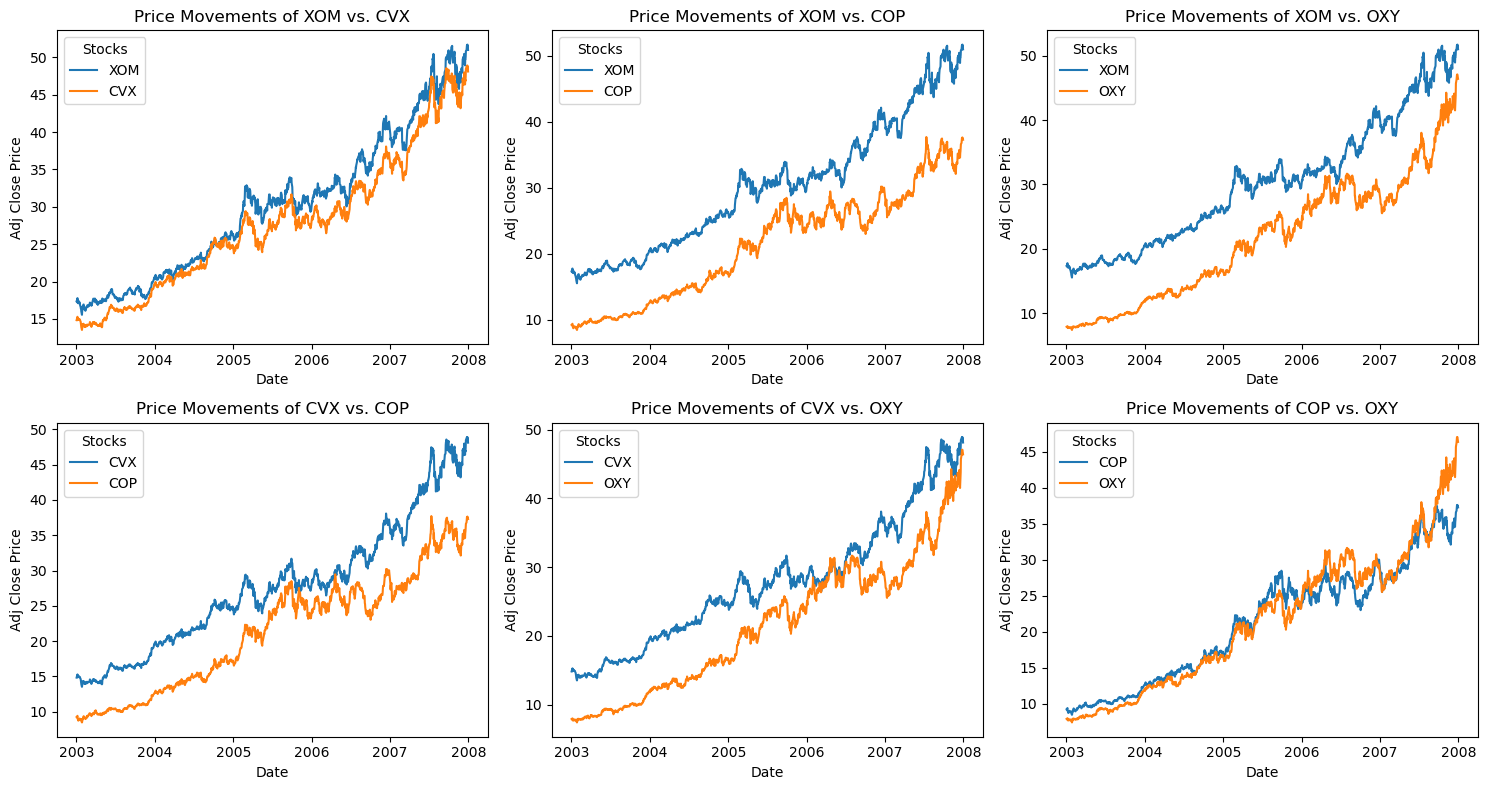

In [74]:

n_pairs = len(symbols) * (len(symbols) - 1) // 2  
n_cols = 3 
n_rows = math.ceil(n_pairs / n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

pair_indx = 0

for i in range(len(symbols)):

    for j in range(i+1, len(symbols)):

        ax = axes[pair_indx]

        ax.plot(market[i]['Date'], market[i]['Adj Close'], label = symbols[i])
        ax.plot(market[j]['Date'], market[j]['Adj Close'], label = symbols[j])

        ax.set_title(f"Price Movements of {symbols[i]} vs. {symbols[j]}")
        ax.set_xlabel("Date")
        ax.set_ylabel("Adj Close Price")
        ax.legend(title='Stocks')
        pair_indx+=1

for x in range(pair_indx, len(axes)):
    fig.delaxes(axes[x])

plt.tight_layout()
plt.show()


### Checking Statistical Evidence
Now we will check for statistical evidence of cointegration, utilizing Augmented Dickey Fuller Tests

#### Estimating Spreads


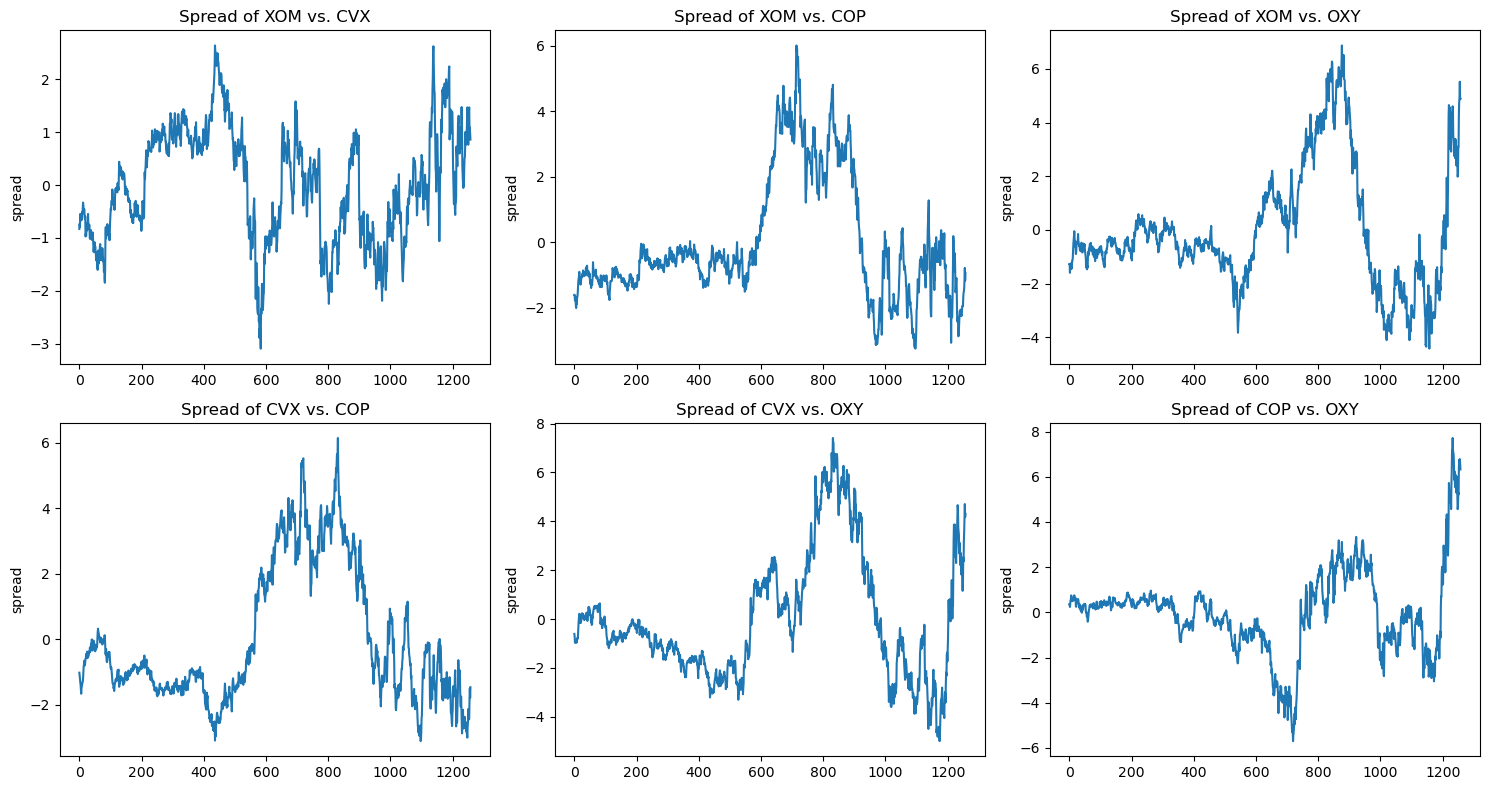

In [75]:
spreads = dict()

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

pair_indx = 0

for i in range(len(symbols)):

    for j in range(i+1, len(symbols)):

        ax = axes[pair_indx]

        X = np.array(market[i]['Adj Close'])
        Y = np.array(market[j]['Adj Close'])
        

        model = linear_model.LinearRegression()

        model.fit(X, Y)
        
        beta = model.coef_[0]
        alpha = model.intercept_

        spread = Y - (beta * X + alpha)

        spreads[tuple((symbols[i], symbols[j]))] = spread

        ax.plot(spread)
        ax.set_ylabel('spread')
        ax.set_title(f"Spread of {symbols[i]} vs. {symbols[j]}")
        pair_indx+=1


for x in range(pair_indx, len(axes)):
    fig.delaxes(axes[x])

plt.tight_layout()
plt.show()





### Performing Augmented Dickey Fuller Test
Given the non-stationarity of the market, we use the ADF test to check for cointegration

In [ ]:
adf_results = list()
best_adf = float('inf')
best_p = 1
best_combo = None

for combo in spreads:

    print(f"Augmented Dickey Fuller Results for {combo[0]} and {combo[1]}")
    print("==============================")
    res = adfuller(spreads[combo])

    print(f"ADF: {res[0]}")
    print(f"p-val: {res[1]}\n")
    adf_results.append(res)

    if res[0] < best_adf and res[1] < best_p:
        best_adf = res[0]
        best_p = res[1]
        best_combo = combo
    

Augmented Dickey Fuller Results for XOM and CVX
ADF: -3.1685788818295433
p-val: 0.021877032218654686

Augmented Dickey Fuller Results for XOM and COP
ADF: -1.932690458803033
p-val: 0.3168421578618581

Augmented Dickey Fuller Results for XOM and OXY
ADF: -1.572997649233569
p-val: 0.4971419048908351

Augmented Dickey Fuller Results for CVX and COP
ADF: -2.0778257908978093
p-val: 0.2535239238263681

Augmented Dickey Fuller Results for CVX and OXY
ADF: -1.7569468571906344
p-val: 0.40203599225680176

Augmented Dickey Fuller Results for COP and OXY
ADF: -1.3289198354936682
p-val: 0.6158398148593004



### 

### Results
Checking to see whether or not we have evidence of CoIntegration

In [117]:
print("Strongest Evidence of Cointegration:")
print("==============================")
print(f"Pair: {best_combo}")
print(f"ADF: {best_adf}")
print(f"p-val: {best_p}")


Strongest Evidence of Cointegration:
Pair: ('XOM', 'CVX')
ADF: -3.1685788818295433
p-val: 0.021877032218654686
